In [25]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 
import os 
from statsmodels.stats import multitest

statspath = '/Users/nicolasfarrugia/Documents/recherche/git/pd_osc_decoding/alldata_proba/'

Step 0 - preparing data 

fields for the saved stats files are : 
- scores
- proba
- pval
- U

For each of them, layout is 4 (Regreg,RegIrreg,IrregReg,IrregIrreg) x CV x TestTime x TrainTime

In [52]:
allsubj = os.listdir(statspath)

Step 1 - Analysis of "Diagonal" Classification

In [148]:
for subj in allsubj[1:3]:
    cursubj = os.path.join(statspath,subj)
    curpvals = np.load(cursubj)['pval'].mean(axis=1) # Calculating mean p-value accross CV splits 
    diag_pvals = np.stack([np.diag(curmat) for curmat in curpvals]) # extract diagonal classification

    diag_sig_fdr = []
    for curdiag in diag_pvals:
        H,p,_,_=multitest.multipletests(curdiag,method='fdr_bh')
        diag_sig_fdr.append(H)

    diag_sig_fdr = np.stack(diag_sig_fdr)

In [154]:
timevec = np.linspace(-0.05,0.52,diag_sig_fdr.shape[1])

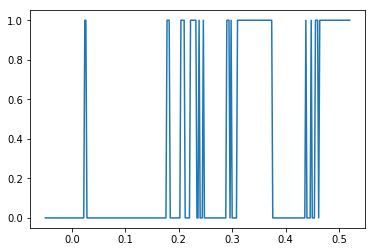

In [155]:
plt.plot(timevec,diag_sig_fdr[0])

Step 2 - Average duration of significant generalization

Step 3a - Across subjects statistics for controls 

Step 3b - Across subjects statistics for patients 